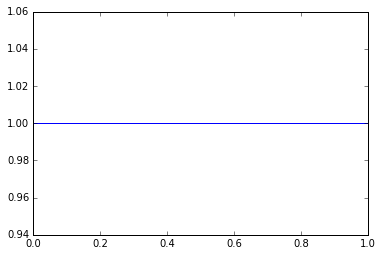

In [4]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0, 1, 100)
a = 1
b = 1
plt.plot(x, beta.pdf(x, a, b))


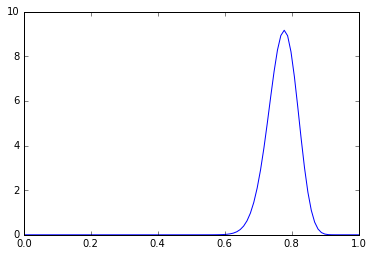

In [5]:
# If we observe n_successes and n_failures then the posterior is a + n_successs, b + n_failures
n_successes = 70
n_failures = 20
plt.plot(x, beta.pdf(x, a + n_successes, b + n_failures))
